<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/french_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome Speech

> Welcome Dave to yet another project on deep learning and machine learning.

## What project are we going to be doing?
> In this project, we will be buiding a deep learning algorithm that is able to translate english language to  french.

## Why this project?
> In the world we are today, there are over 7,000 language and the need for us to translate this languages are now important now than ever. 

## The Dataset we will be using
> The dataset we will be using for this project is available and open source, we will be working with a smaller version of the data now

## What are we going to cover?
> At the end of this project, we are to have a dep learning model that can translate english language to french with at least 95% accuracy.


### Goodluck Dave... Happy coding

In [1]:
%load_ext autoreload
%aimport helper, tests
%autoreload 1


In [2]:
# Let imort the useful libaries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Let download our english and french dataset
!wget https://raw.githubusercontent.com/tommytracey/AIND-Capstone/master/data/small_vocab_fr
!wget https://raw.githubusercontent.com/tommytracey/AIND-Capstone/master/data/small_vocab_en

--2022-09-17 10:07:28--  https://raw.githubusercontent.com/tommytracey/AIND-Capstone/master/data/small_vocab_fr
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10135742 (9.7M) [text/plain]
Saving to: ‘small_vocab_fr’

small_vocab_fr      100%[===================>]   9.67M  --.-KB/s    in 0.1s    

2022-09-17 10:07:28 (85.6 MB/s) - ‘small_vocab_fr’ saved [10135742/10135742]

--2022-09-17 10:07:28--  https://raw.githubusercontent.com/tommytracey/AIND-Capstone/master/data/small_vocab_en
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [4]:
# Let create a funtion to help us preprocess our data
import os


def load_data(path):
    """
    Load dataset
    """
    input_file = os.path.join(path)
    with open(input_file, "r") as f:
        data = f.read()

    return data.split('\n')

In [5]:
english_sentence= load_data("/content/small_vocab_en")
french_sentence= load_data("/content/small_vocab_fr")

In [6]:
english_sentence

['new jersey is sometimes quiet during autumn , and it is snowy in april .',
 'the united states is usually chilly during july , and it is usually freezing in november .',
 'california is usually quiet during march , and it is usually hot in june .',
 'the united states is sometimes mild during june , and it is cold in september .',
 'your least liked fruit is the grape , but my least liked is the apple .',
 'his favorite fruit is the orange , but my favorite is the grape .',
 'paris is relaxing during december , but it is usually chilly in july .',
 'new jersey is busy during spring , and it is never hot in march .',
 'our least liked fruit is the lemon , but my least liked is the grape .',
 'the united states is sometimes busy during january , and it is sometimes warm in november .',
 'the lime is her least liked fruit , but the banana is my least liked .',
 'he saw a old yellow truck .',
 'india is rainy during june , and it is sometimes warm in november .',
 'that cat was my most l

In [7]:
french_sentence

["new jersey est parfois calme pendant l' automne , et il est neigeux en avril .",
 'les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .',
 'california est généralement calme en mars , et il est généralement chaud en juin .',
 'les états-unis est parfois légère en juin , et il fait froid en septembre .',
 'votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .',
 "son fruit préféré est l'orange , mais mon préféré est le raisin .",
 'paris est relaxant en décembre , mais il est généralement froid en juillet .',
 'new jersey est occupé au printemps , et il est jamais chaude en mars .',
 'notre fruit est moins aimé le citron , mais mon moins aimé est le raisin .',
 'les états-unis est parfois occupé en janvier , et il est parfois chaud en novembre .',
 'la chaux est son moins aimé des fruits , mais la banane est mon moins aimé.',
 'il a vu un vieux camion jaune .',
 'inde est pluvieux en juin , et il est parfois chaud en novembre .

In [8]:
# Let have a visual of our english and french sentence

for i in range(5):
  print("English sentence {}: {}". format(i +1 , english_sentence[i]))
  print("French sentence {}: {}\n".format(i +1, french_sentence[i]))

English sentence 1: new jersey is sometimes quiet during autumn , and it is snowy in april .
French sentence 1: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .

English sentence 2: the united states is usually chilly during july , and it is usually freezing in november .
French sentence 2: les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .

English sentence 3: california is usually quiet during march , and it is usually hot in june .
French sentence 3: california est généralement calme en mars , et il est généralement chaud en juin .

English sentence 4: the united states is sometimes mild during june , and it is cold in september .
French sentence 4: les états-unis est parfois légère en juin , et il fait froid en septembre .

English sentence 5: your least liked fruit is the grape , but my least liked is the apple .
French sentence 5: votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .



### Preprocessing our sentences

In [9]:
import collections

In [10]:
english_words_counter = collections.Counter([word for sentence in english_sentence for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentence for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentence for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentence for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


In [11]:
# Let preprocess our english sentence
# Let get the total words in our english sentence

total_english_sentence= [len(sentence.split()) for sentence in english_sentence]
print(f"Total sentence we have in our English setence is {np.sum(total_english_sentence)}")
print(f"Average senentence in our english sentence is {np.mean(total_english_sentence)}")
print(f"Maximum sentence in our english sentence is {np.max(total_english_sentence)}\n")

total_french_sentence= [len(sentence.split()) for sentence in french_sentence]
print(f"Total sentence we have in our French sentence is {np.sum(total_french_sentence)}")
print(f"Average senentence in our french sentence is {np.mean(total_french_sentence)}")
print(f"Maximum sentence in our french sentence is {np.max(total_french_sentence)}")

Total sentence we have in our English setence is 1823250
Average senentence in our english sentence is 13.225277634719028
Maximum sentence in our english sentence is 17

Total sentence we have in our French sentence is 1961295
Average senentence in our french sentence is 14.226612312401622
Maximum sentence in our french sentence is 23


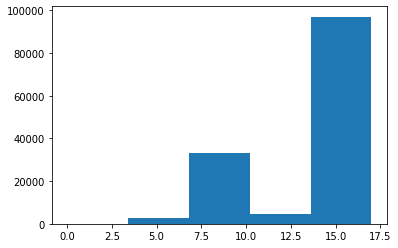

In [12]:
# Let check the distribution of our english sentence
plt.hist(total_english_sentence, bins=5);

In [13]:
# Let check for the best percentile
english_output_sequence_length= int(np.percentile(total_english_sentence, 95))
english_output_sequence_length
# For our train sentence, i think 95% covers almost all our sentence

16

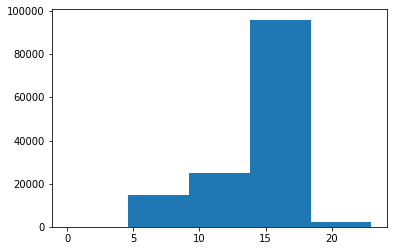

In [14]:
# Let check the distribution of our english sentence
plt.hist(total_french_sentence, bins=5);

In [15]:
# Let check for the best percentile
french_output_sequence_length= int(np.percentile(total_french_sentence, 90))
french_output_sequence_length
# For our train sentence, i think 95% covers almost all our sentence

17

In [16]:
# Let get the max tokens
english_max_token= 15000
french_max_token= 15000

In [17]:
# Let tokenized our english sentence
from tensorflow.keras.layers import TextVectorization

In [18]:
english_sentence_token= TextVectorization(max_tokens=english_max_token,
                                         output_sequence_length= english_output_sequence_length,
                                          name="English_text_tokenizer")

# Let adapt it to our english text sentence
english_sentence_token.adapt(english_sentence)

In [19]:
# Let get some inportant features from our token sentence
english_words_in_vocab= english_sentence_token.get_vocabulary()

print(f"Numbers of words in vocab {len(english_words_in_vocab)}")
print(f"Ten most common words in our english sentence {english_words_in_vocab[:10]}")
print(f"Ten least common words in our english sentence {english_words_in_vocab[-10:]}")

Numbers of words in vocab 201
Ten most common words in our english sentence ['', '[UNK]', 'is', 'in', 'it', 'during', 'the', 'but', 'and', 'sometimes']
Ten least common words in our english sentence ['would', 'been', 'arent', 'weather', 'isnt', 'has', 'does', 'am', 'where', 'have']


In [20]:
english_vocab_size = english_sentence_token.vocabulary_size()
english_vocab_size

201

In [21]:
# Let tokenized our french sentence
french_sentence_token= TextVectorization(max_tokens=french_max_token,
                                         output_sequence_length= french_output_sequence_length,
                                          name="English_text_tokenizer")

# Let adapt it to our english text sentence
french_sentence_token.adapt(french_sentence)

In [22]:
# Let get some inportant features from our token sentence
french_words_in_vocab= french_sentence_token.get_vocabulary()

print(f"Numbers of words in vocab {len(french_words_in_vocab)}")
print(f"Ten most common words in our french sentence {french_words_in_vocab[:10]}")
print(f"Ten least common words in our french sentence {french_words_in_vocab[-10:]}")

Numbers of words in vocab 347
Ten most common words in our french sentence ['', '[UNK]', 'est', 'en', 'il', 'les', 'mais', 'et', 'la', 'parfois']
Ten least common words in our french sentence ['détend', 'apprécié', 'trouvé', 'souvent', 'moteur', 'favoris', 'faire', 'estu', 'astu', 'allions']


In [23]:
from tensorflow.keras.layers import Embedding

In [24]:
# let create our embedding layers
english_sentence_embed= Embedding(input_dim= len(english_words_in_vocab),
                                  output_dim=128)

english_sentence_embed

In [25]:
# Let pass a random inglish sentence into our embeddingand text vectorizer

import random

random.seed(42)

random_english_sentence= random.choice(english_sentence)
# Let pass it into our text vectotizer layer
random_sentence_vectorized= english_sentence_token([random_english_sentence])
# Let pass it into our embedding layer
random_sentence_embed= english_sentence_embed(random_sentence_vectorized)

print(f"Random sentence:\n {random_english_sentence} \n")
print(f"Random sentence after passing it into our text vectorizer:\n {random_sentence_vectorized} \n")
print(f"Random sentence after passing it into our embedding layer: \n {random_sentence_embed} ")


Random sentence:
 she likes bananas , mangoes , and pears . 

Random sentence after passing it into our text vectorizer:
 [[27 70 80 76  8 73  0  0  0  0  0  0  0  0  0  0]] 

Random sentence after passing it into our embedding layer: 
 [[[ 0.0181868   0.01922413 -0.02070132 ...  0.04114236 -0.03969529
   -0.04965923]
  [ 0.03372898  0.01987587  0.04633569 ... -0.04357394  0.01689886
   -0.04412246]
  [ 0.03214294  0.02889825 -0.00549912 ...  0.0430972   0.02683412
   -0.00363201]
  ...
  [ 0.01159019  0.024686   -0.01808872 ...  0.01358713 -0.02031632
    0.03824383]
  [ 0.01159019  0.024686   -0.01808872 ...  0.01358713 -0.02031632
    0.03824383]
  [ 0.01159019  0.024686   -0.01808872 ...  0.01358713 -0.02031632
    0.03824383]]] 


In [26]:
# let create our embedding layers
french_sentence_embed= Embedding(input_dim= len(french_words_in_vocab),
                                  output_dim=128)

french_sentence_embed

In [27]:
# Let pass a random inglish sentence into our embeddingand text vectorizer

import random

random.seed(42)

random_french_sentence= random.choice(french_sentence)
# Let pass it into our text vectotizer layer
random_sentence_vectorized= french_sentence_token([random_french_sentence])
# Let pass it into our embedding layer
random_sentence_embed= french_sentence_embed(random_sentence_vectorized)

print(f"Random sentence:\n {random_french_sentence} \n")
print(f"Random sentence after passing it into our text vectorizer:\n {random_sentence_vectorized} \n")
print(f"Random sentence after passing it into our embedding layer: \n {random_sentence_embed} ")


Random sentence:
 elle aime les bananes , les mangues et les poires . 

Random sentence after passing it into our text vectorizer:
 [[28 55  5 75  5 78  7  5 72  0  0  0  0  0  0  0  0]] 

Random sentence after passing it into our embedding layer: 
 [[[-0.04792058  0.03817714 -0.01121138 ...  0.02304291  0.01028814
   -0.01719959]
  [ 0.01507297 -0.02746399  0.03996301 ...  0.02748451  0.03289815
    0.00636252]
  [-0.03913559  0.00049096 -0.00443584 ... -0.04390481 -0.02998981
   -0.0479408 ]
  ...
  [ 0.01038785  0.00721008 -0.03985274 ... -0.00353768  0.01528073
   -0.01729602]
  [ 0.01038785  0.00721008 -0.03985274 ... -0.00353768  0.01528073
   -0.01729602]
  [ 0.01038785  0.00721008 -0.03985274 ... -0.00353768  0.01528073
   -0.01729602]]] 


In [28]:
french_sentence.reshape(french_sentence.shape[0], french_sentence.shape[1], 1)

AttributeError: ignored

## Modelling 

> We are up yp modelling, we will start by bulding a simple model with just two layers and we will be making predictions with it to see how our model looks like


### model_0:  baseline model

In [29]:
from tensorflow.keras import layers

In [30]:
output_unit= np.max(total_french_sentence)
output_unit

23

In [31]:
english_sentence_embed, english_sentence_token

(<keras.layers.embeddings.Embedding at 0x7fd75e4ce850>,
 <keras.layers.preprocessing.text_vectorization.TextVectorization at 0x7fd75e682f50>)

In [32]:
input_layer= layers.Input(shape=(1, ), dtype=tf.string, name="input_layer")
text_vectorizer= english_sentence_token(input_layer)
text_embed= english_sentence_embed(text_vectorizer)
x= layers.Bidirectional(layers.LSTM(64, go_backwards= True , return_sequences=True))(text_embed)
x= layers.Bidirectional(layers.LSTM(64, go_backwards=True , return_sequences= True))(x)
# x= layers.GlobalMaxPool1D()(x)

output_layer= layers.TimeDistributed(layers.Dense(output_unit, activation="softmax"))(x)

model_0= tf.keras.Model(inputs= input_layer,
                         outputs=output_layer)

In [33]:
# Let get the summary of our model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 English_text_tokenizer (Tex  (None, 16)               0         
 tVectorization)                                                 
                                                                 
 embedding (Embedding)       (None, 16, 128)           25728     
                                                                 
 bidirectional (Bidirectiona  (None, 16, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 16, 128)          98816     
 nal)                                                            
                                                             

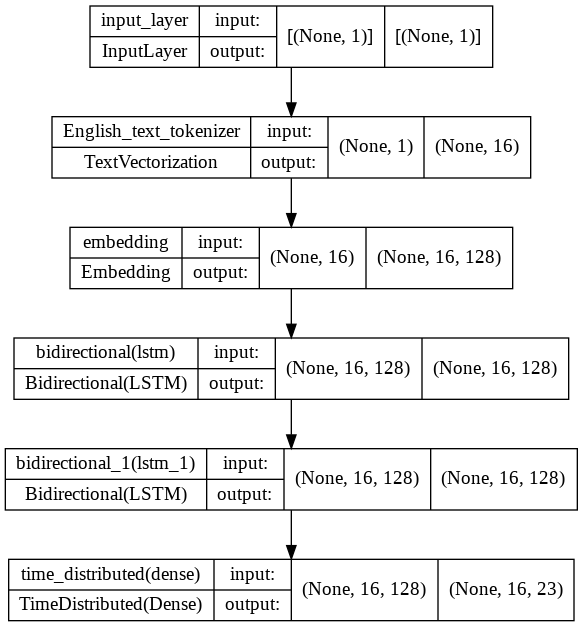

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model_0, show_shapes=True)

In [35]:
# Let compile our model
model_0.compile(loss=  tf.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
train_label= french_sentence_token(french_sentence )

print(french_sentence[1])
print(train_label[1])

In [36]:
# let create a tensorflow dataset
eng_data= tf.data.Dataset.from_tensor_slices((english_sentence, french_sentence))
print(eng_data)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [38]:
# Let fit our model
history_model_0= model_0.fit(eng_data,
                             epochs=10)

Epoch 1/10


ValueError: ignored